# Credit Risk Evaluator

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
df = pd.read_csv("./Resources/lending_data.csv")
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [3]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


### Identifying X and y for the Model prediction

In [4]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

### Prediction and Justification

Considering the two models to be analysed in this exercise, I believe that Logistic Regression will present a better performance than the Random Forest classifier.

This can be justified considering the Logistic Regression model will improve due to scaling, whilst the Random Forest classifier may overfit.

## Split the Data into Training and Testing Sets

### Step 0 :: Split the Data into Training and Validation

In [5]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Step 1 :: Preprocess the Data

In [6]:
# Scaling the data to compare the performance of the different models

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

## 1) Logistic Regression Model

### Step 2 :: Instantiate the model

In [7]:
lr_model = LogisticRegression()

### Step 3 :: Train the model

In [8]:
# Train a Logistic Regression model and print the model score
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

### Step 4 :: Make the prediction

In [9]:
y_pred = lr_model.predict(X_test_scaled)

# Presenting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.98      0.91       592

    accuracy                           0.99     19384
   macro avg       0.93      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



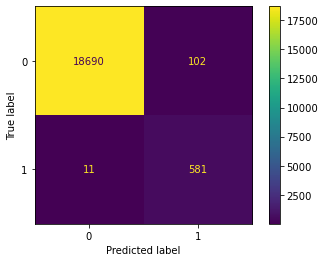

In [10]:
# Creating the Confusion Matrix to be displayed
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)

# Displaying the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

### Step 5 :: Evaluate the performance of the model

In [11]:
print("*****************************")
print("* Logistic Regression Model *")
print("*****************************")
print("Training Score: ", lr_model.score(X_train_scaled, y_train))
print("Testing Score: ", lr_model.score(X_test_scaled, y_test))

*****************************
* Logistic Regression Model *
*****************************
Training Score:  0.9941188609162196
Testing Score:  0.9941704498555509


## 2) Random Forest Classifier

### Step 2 :: Instantiate the model

In [12]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier()

### Step 3 :: Train the model

In [13]:
# Train a Random Forest Classifier model and print the model score
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

### Step 4 :: Make the prediction

In [14]:
y_pred = clf.predict(X_test_scaled)

# Presenting the Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.84      0.90      0.87       592

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384



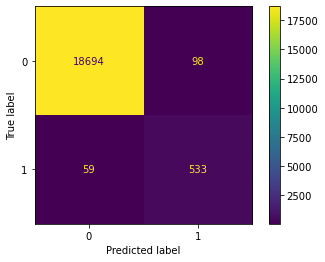

In [15]:
# Creating the Confusion Matrix to be displayed
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Displaying the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### Step 5 :: Evaluate the performance of the model

In [16]:
print("**********************************")
print("* Random Forest Classifier Model *")
print("**********************************")
print("Training Score: ", clf.score(X_train_scaled, y_train))
print("Testing Score: ", clf.score(X_test_scaled, y_test))

**********************************
* Random Forest Classifier Model *
**********************************
Training Score:  0.9971798046498831
Testing Score:  0.991900536524969


# Conclusion

In this exercise, it was possible to conclude that both Logistic Regression Model and Random Forest Classifier Model performed very well, and performance around 99%.

Analysing the results in more details, we can identify the following:

 * The Logistic Regression Model performed well on both training and testing data, and scored 0.9941.
 * The Random Forest Classifier Model presented very slight difference between training (0.9971) and testing data (0.9919), which may represent over-fit of the model.

Finally, I would use and recommend the Logistic Regression model for this challenge, which presented stable performance for both training and testing score, minimising the risk of over-fit.